# Week 3 Notes

## 3.1 [Churn prediction project](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/01-churn-project.md)

We want to predict the likelihood of a customer churning. Churning means that the customer stops using the product or service. For example a telecom company would like to know which customers are likely to churn to offer them a promotional discount to prevent them from churning. However, it's important to avoid wrong predictions, because:
- If a customer is predicted to churn, but doesn't (**false positive**), the discount would not have been necessary
- If a customer is not predicted to churn, but does (i.e. **false negative**), we lose that customer

We will create a classification model $g$, which will predict $y_i$, which is either 0 (did not churn) or 1 (churned). $g$ will output a continuous number between 0 and 1 (churned) representing the churn likelihood. $i$ refers to the customer.

$$
g(x_i) \approx y_i \quad y_i \in \{0, 1\}
$$

## 3.2 [Data preparation](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/02-data-preparation.md)

In [2]:
# data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
# !wget $data -O data-week-3.csv

In [3]:
import pandas as pd


df = pd.read_csv("data-week-3.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's check all the columns:

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Let's normalize the columns:

In [6]:
df.columns = (
    df.columns
    .str.replace(" ", "_")
    .str.lower()
)

In [7]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Let's do the same for the values in `object` columns.

In [8]:
for col in df.select_dtypes(object).columns:
    df[col] = (
        df[col]
        .str.lower()
        .str.replace(" ", "_")
    )

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


We will clean the data. Columns with 2 values are turned into `boolean` dtypes. Columns with numeric values are turned into numeric dtypes such as `float` and `int`. We use `pd.to_numeric(..., downcast=...)` to downcast to the most memory efficient dtypes while retaining the needed precision.

In [11]:
df = (
    df
    .assign(
        partner=lambda df_: pd.to_numeric((df_.partner=="yes").astype(int), downcast="integer"),
        seniorcitizen=lambda df_: pd.to_numeric(df_.seniorcitizen, downcast="integer"),
        dependents=lambda df_: pd.to_numeric((df_.dependents=="yes").astype(int), downcast="integer"),
        phoneservice=lambda df_: pd.to_numeric((df_.phoneservice=="yes").astype(int), downcast="integer"),
        paperlessbilling=lambda df_: pd.to_numeric((df_.paperlessbilling=="yes").astype(int), downcast="integer"),
        tenure=lambda df_: pd.to_numeric(df_.tenure, downcast="integer"),
        monthlycharges=lambda df_: pd.to_numeric(df_.monthlycharges, downcast="float"),
        totalcharges=lambda df_: pd.to_numeric(df_.totalcharges.replace("_", "0"), errors="coerce", downcast="float"),
        churn=lambda df_: pd.to_numeric((df_.churn=="yes").astype(int), downcast="integer"),
    )
    .astype(
        {
            "customerid": "string",
            "gender": "category",
            "multiplelines": "category",
            "internetservice": "category",
            "onlinesecurity": "category",
            "onlinebackup": "category",
            "deviceprotection": "category",
            "techsupport": "category",
            "streamingtv": "category",
            "streamingmovies": "category",
            "contract": "category",
            "paymentmethod": "category",
        }
    )
)

In [12]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,1,0,0,0,0
dependents,0,0,0,0,0
tenure,1,34,2,45,2
phoneservice,0,1,1,0,1
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   string  
 1   gender            7043 non-null   category
 2   seniorcitizen     7043 non-null   int8    
 3   partner           7043 non-null   int8    
 4   dependents        7043 non-null   int8    
 5   tenure            7043 non-null   int8    
 6   phoneservice      7043 non-null   int8    
 7   multiplelines     7043 non-null   category
 8   internetservice   7043 non-null   category
 9   onlinesecurity    7043 non-null   category
 10  onlinebackup      7043 non-null   category
 11  deviceprotection  7043 non-null   category
 12  techsupport       7043 non-null   category
 13  streamingtv       7043 non-null   category
 14  streamingmovies   7043 non-null   category
 15  contract          7043 non-null   category
 16  paperlessbilling  7043 n

## 3.3 [Setting up the validation framework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/03-validation.md)


We will split the data into train, validation, and test. Instead of doing it using `numpy`, we will use a popular ML library called `scikit-learn`.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

We will make a 60-20-20 split again:

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
print(df_train.shape[0])
print(df_val.shape[0])
print(df_test.shape[0])

4225
1409
1409


In [18]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [20]:
y_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int8)

## 3.4 [EDA](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/04-eda.md)


For EDA, we will look at `df_full_train`. So we will not look at `df_test`. Let's start by checking missing values:

In [21]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There are no missing values. Next, let's look at the distribution of our target variable `churn`:

In [22]:
import matplotlib.pyplot as plt

df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
# Another way to normalize
global_churn_rate = df_full_train.churn.mean().round(2)
global_churn_rate

np.float64(0.27)

There is a churn rate of 27%. 

In [24]:
numeric = ["tenure", "monthlycharges", "totalcharges"]
categorical = df_full_train.drop(columns=["churn", "tenure"]).select_dtypes(include=["category", "int8"]).columns

## 3.5 [Feature importance: Churn rate and risk ratio](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/05-risk.md)


We want to look at churn rate for different groups (e.g. based on gender):

In [25]:
(
    df_full_train
    .groupby("gender", observed=True)
    .churn
    .mean()
)

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [26]:
(
    df_full_train
    .groupby("partner", observed=True)
    .churn
    .mean()
)

partner
0    0.329809
1    0.205033
Name: churn, dtype: float64

We see that the churn rate per gender is very close to the global churn rate. On the other hand, the churn rate based on the `partner` feature does differ significantly between having a partner or not. Therefore, the `partner` feature is likely more important than the `gender` feature. We can define a measure of feature importance as the **difference** between the global churn rate and the churn rate per group:

In [27]:
df_full_train.churn.mean() - df_full_train.groupby("gender", observed=True).churn.mean()

gender
female   -0.006856
male      0.006755
Name: churn, dtype: float64

In [28]:
df_full_train.churn.mean() - df_full_train.groupby("partner", observed=True).churn.mean()

partner
0   -0.059841
1    0.064935
Name: churn, dtype: float64

A negative number here means that a certain group is less likely to churn. A positive number means a group is more likely to churn. The magnitude indicates the strength of this relationship. Features can be compared this way.

Alternatively we could **divide** instead of calculating the difference:

In [29]:
df_full_train.churn.mean() / df_full_train.groupby("gender", observed=True).churn.mean()

gender
female    0.975233
male      1.025662
Name: churn, dtype: float64

In [30]:
df_full_train.churn.mean() / df_full_train.groupby("partner", observed=True).churn.mean()

partner
0    0.818559
1    1.316703
Name: churn, dtype: float64

In [31]:
for col in categorical:
    display(
        (
            df_full_train
            .groupby(col, observed=True)
            .churn
            .agg(["mean", "count"])
        )
        .assign(
            diff=lambda df_: df_["mean"] - df_full_train.churn.mean(),
            risk=lambda df_: df_["mean"] / df_full_train.churn.mean()
        )
    )

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
0,0.329809,2932,0.059841,1.221659
1,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
0,0.313760,3968,0.043792,1.162212
1,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
0,0.241316,547,-0.028652,0.893870
1,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
0,0.172071,2313,-0.097897,0.637375
1,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


From the above numbers, we can discern which features will be important for our classification model. However for a large number of features and groups, it becomes intractable. Can we quantify the importance of a feature?

## 3.6 [Feature importance: Mutual information](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/06-mutual-info.md)


Mutual information is a way of measuring the importance of categorical variables. In the previous lesson, we came up with a measure for feature importance. This lesson we will look at **Mutual Information**. This is a concept from Information Theory which measures the mutual dependence between two variables. More specifically, if we observe a feature (e.g. `paymentmethod`), how much do we then know about the target variable (`churn`)?

$$
\mathbf{I}(X;Y) = \sum_{y \in Y} \sum_{x \in X} p_{(X, Y)}(x, y) \log \left( \frac{p_{(X, Y)}(x, y)} {p_{X}(x) p_{Y}(y)} \right)
$$

where: $p_{X, Y}$ is the **joint probability mass function** of $X$ and $Y$, and $p_{X}$ and $p_{Y}$ are the **marginal probability mass functions** of $X$ and $Y$ respectively.

In [32]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [33]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

np.float64(0.009967689095399745)

In [34]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

np.float64(0.0001174846211139946)

`contract` seems to be the most important variable for explaining `churn`, followed by `partner`, and then `gender`. Let's apply it to all variables:

In [35]:
df_full_train[categorical].apply(lambda s: mutual_info_score(s, df_full_train.churn)).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 [Feature importance: Correlation](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/07-correlation.md)


Where **Mutual Information** is used to check the relationship between **categorical variables** and a target variable, the **correlation coefficient** is used to check the relationship between **continuous variables** and a target variable. A value close to 0 indicates a weak correlation and close to 1 or 1- a strong correlation. A negative correlation means an increase in one variable leads to a decrease in the other variable. A positive correlation means both variables move together.

In [36]:
df_full_train[numeric].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

We can see that as `tenure` increases, the likelihood of `churn` decreases. Same goes for `totalcharges`. Of course `totalcharges` is correlated with `tenure`. On the other hand, when `monthlycharges` increases (so not considering how long a customer stayed), `churn` is more likely.

<Axes: xlabel='tenure'>

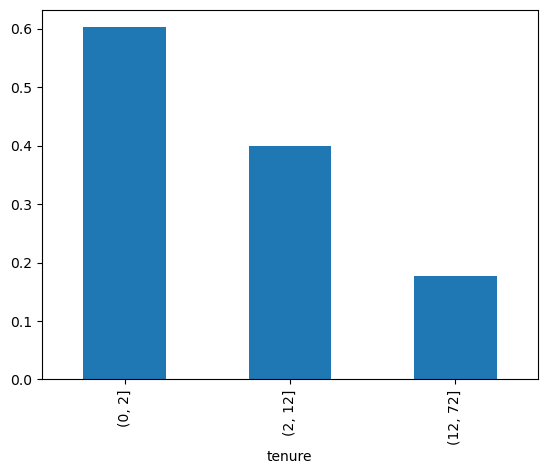

In [69]:
(
    df_full_train
    .groupby(
        by=pd.cut(df_full_train.tenure, bins=[0, 2, 12, 72]),
        observed=True,)["churn"]
    .mean()
    .plot
    .bar()
)

We can see that as tenure increases, churn rate decreases, demonstrating the negative correlation between `tenure` and `churn` we found earlier.

## 3.8 [One-hot encoding](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/08-ohe.md)


## 3.9 [Logistic regression](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/09-logistic-regression.md)


## 3.10 [Training logistic regression with Scikit-Learn](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/10-training-log-reg.md)


## 3.11 [Model interpretation](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/11-log-reg-interpretation.md)


## 3.12 [Using the model](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/12-using-log-reg.md)


## 3.13 [Summary](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/13-summary.md)


## 3.14 [Explore more](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/14-explore-more.md)


## 3.15 [Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/homework.md)